In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#10.1 생물학적 뉴런에서 인공 뉴런까지

##10.1.1 생물학적 뉴런

아하 뉴런은 이렇게 구성되어 있구나!!

##10.1.2 뉴런을 사용한 논리 연산

복잡한 논리 표현식을 계산하기 위해 네트워크들을 연결하면 된다..

##10.1.3 퍼셉트론

퍼셉트론은 층이 하나뿐인 TLU로 구성됨

###TLU

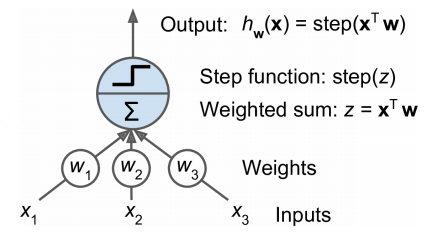



TLU에서 가장 널리 사용되는 계단 함수 : **헤비사이드 계단 함수**

- $
heaviside(z) = \begin{cases}0 & z < 0 \text{일 때} \\
1 & z \ge 0 \text{일 때}
\end{cases}
$

- $
sgn(z) = \begin{cases}-1 & z < 0 \text{일 때}\\
0 & z = 0 \text{일 때}\\
1 & z > 0 \text{일 때}
\end{cases}
$


**완전 연결 층 (밀집 층)**

- 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있는 경우



퍼셉트론의 **입력 뉴런**에 입력을 넣고, **편향** 특성을 더해서 출력으로 보낸다..

**완전 연결 층의 출력 계산**

$h_{\mathbf{X}, \mathbf{b}}(\mathbf{X}) = \phi(\mathbf{XW} + \mathbf{b})$

- $\mathbf{X}$ : 입력특성의 행렬..
- $\mathbf{W}$ : 편향 뉴런을 제외한 모든 연결 가중치를 포함한 행렬..
    - 행 : 입력 뉴런
    - 열 : 출력층의 인공 뉴런
- $\mathbf{b}$ : 편향 뉴런과 인공 뉴런 사이의 모든 연결 가중치..
- $\phi$ : **활성화 함수**

###퍼셉트론의 훈련

**헤브의 규칙**에서 영감을 받음..

- 두 뉴런이 동시에 활성화될 때마다 이들 사이의 연결 가중치가 증가하는 경향이 있다..
- 퍼셉트론은 네트워크가 예측할 때 만드는 오차를 반영하도록 조금 변형된 규칙을 사용하여 훈련
- **퍼셉트론의 학습 규칙은 오차가 감소되도록 연결을 강화시키는 것이다..**
    - 잘못된 예측을 하는 모든 출력 뉴런에 대해 올바른 예측을 만들 수 있도록 입력에 연결된 가중치를 강화시킨다

**퍼셉트론 학습 규칙**

$
w_{i, j}^{\text{(next step)}} = w_{i, j} + \eta(y_j - \hat{y}_j)x_i
$

- 다음 가중치 = 현재 가중치 + (학습률)*(타깃 - 예측)*(입력)
- $w_{i, j}$ : $i$번 째 입력 뉴런과 $j$번 째 출력 뉴런 사이의 가중치
- $x_i$ : 현재 훈련 샘플의 $i$번째 뉴런의 입력값
- $\hat{y}_j$ : $j$번째 출력 뉴런의 출력값
- $y_j$ : $j$번째 출력 뉴런의 타깃
- $\eta$ : 학습률

**퍼셉트론 수렴 이론**

- 퍼셉트론 하나 가지고는 복잡한 패턴 학습 불가능
- 훈련 샘플이 선형적으로 구분될 수 있다면 퍼셉트론이 정답에 수렴한다

**단층퍼셉트론의 한계**

- XOR게이트와 같은 간단한 문제를 못 푼다..
- **다층 퍼셉트론(MLP)**로 해결 할 수 있다..

##10.1.4 다층 퍼셉트론과 역전파

###다층 퍼셉트론

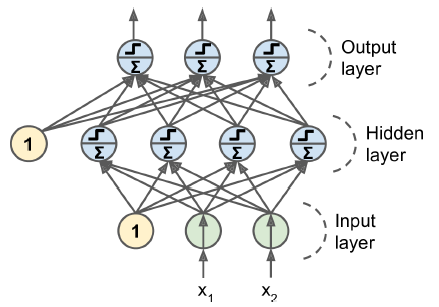

**다층 퍼셉트론** = **입력층** + **하나이상의 은닉층** + **출력층**

은닉층을 여러개 쌓아올린 인공 신경망을 **심층 신경망(DNN)**이라고 함

###역전파

- 대강 느낌은 정방향으로 가면서 예측하고, 역방향으로 오면서 가중치와 편향을 바꾼다...

**역전파 알고리즘**

1. 하나의 미니배치씩 진행하여 전체 훈련 세트를 처리하는 과정(각 반복이 **에포크**)

2. 각 미니배치를 입력층으로 전달해서 모든 뉴런의 출력을 계산함..
    - **정방향 계산**
    - 출력층의 출력을 계산할 때까지.. (예측 과정과 동일)
    - **역방향 계산을 위해 중간 계산값을 모두 저장**

3. 알고리즘이 네트워크의 출력 오차를 측정
4. 각 출력 연결이 이 오차에 기여하는 정도를 계산
    - **연쇄법칙**(Chain Rule) 사용..
    - **역방향 계산**
    - 입력층에 도달할 때까지 오차 그레이디언트를 거꾸로 전파..
    - 최종적으로 모든 연결 가중치에 대한 오차 그레이디언트를 계산 가능..

5. 오차 그레이디언트를 사용해서 네트워크에 있는 모든 연결 가중치를 수정

**정리**

- 정방향으로 가면서 중간 계산값을 모두 저장하면서 예측을 만듦
- 예측이 생겼으니 오차가 있음
- 역방향으로 각 연결이 그 오차에 얼만큼 기여했는지 계산해 나감..(연쇄법칙)
- 오차가 감소하도록 가중치 조정..

###활성화 함수

- 대깨 비선형함수..

In [65]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

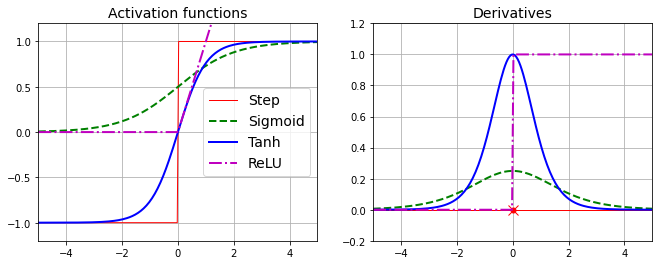

In [68]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

##10.1.5 회귀를 위한 다층 퍼셉트론

- **출력 층의 뉴런 수 = 예측해야 하는 값의 수**

- 출력층에서 활성화 함수로 범위 조정 가능

    - ex) ReLU 함수를 사용해서 출력을 항상 양수로..

- 손실함수는 보통 RMSE, 이상치가 많다면 MSE

##10.1.6 분류를 위한 다층 퍼셉트론

원하는 분류 방법에 따라서 구조가 조금씩 다르다!

- 이진분류
    - 출력층 1개에 시그모이드 활성화 함수 사용..
- 다중 레이블 분류
    - 분류해야하는 가짓수 만큼 출력뉴런을 만듦..
        - ex) 스팸 + 긴급한 메일 두개를 분류 -> 출력 뉴런 2개 필요
    - 시그모이드 활성화 함수
- 다중분류
    - 출력 뉴런을 클래스마다 하나씩 만듦..
    - 소프트맥스를 활성화 함수로 사용..

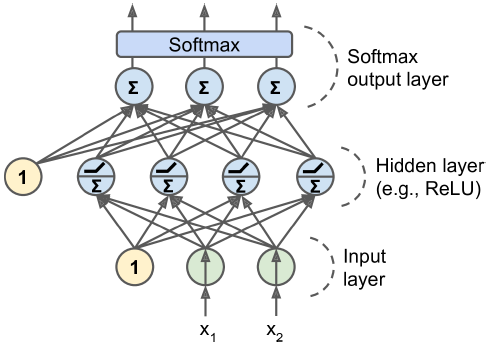

#10.2 케라스로 다층 퍼셉트론 구현하기

##10.2.1 텐서플로 2 설치

In [2]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.6.0'

In [3]:
keras.__version__

'2.6.0'

##10.2.2 시퀀셜 API를 사용하여 이미지 분류기 만들기

###케라스를 사용하여 데이터셋 적재하기

In [4]:
#데이터 불러오기//

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
print(X_train_full.shape)

#데이터 타입이 0~255의 정수형..
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [6]:
#검증세트 분리하고 스케일링까지..

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
#클래스 이름 준비..

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

###시퀀셜 API를 사용하여 모델 만들기

층을 하나씩 추가하는 방법

In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape=[28,28]))        #입력모양 명시..
model.add(keras.layers.Dense(300, activation="relu"))       #1번째 은닉층
model.add(keras.layers.Dense(100, activation="relu"))       #2번째 은닉층
model.add(keras.layers.Dense(10, activation="softmax"))     #다중분류(10개의 클래스)

Sequential 모델을 만들때 층의 리스트를 전달하는 방법

In [10]:
#위의 층과 순서 같음..

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

모델의 요약본을 보여주는 summary()메서드

- Dense층은 파라미터가 많다.. -> **유연성**을 가지지만 **과대적합 위험**도 있다..

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
#모든 층 확인..
model.layers

In [13]:
#층을 인덱싱으로 가져올 수도 있다..
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [16]:
#층을 이름으로 가져오기..
model.get_layer('dense_3') is hidden1

True

In [17]:
#파라미터는 get_weights()와 set_weights()를 사용해서 접근 가능

weights, biases = hidden1.get_weights()

print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.02553563  0.05914272 -0.06740021 ...  0.01845283 -0.00180461
   0.01201852]
 [-0.04342228 -0.06242894 -0.05614512 ... -0.07350495 -0.06379109
   0.01146454]
 [ 0.01683434  0.03777402  0.02653033 ...  0.05587855 -0.0707761
   0.01198045]
 ...
 [ 0.0526699   0.00332218  0.01839976 ...  0.02379081  0.0103582
  -0.02309121]
 [ 0.05391356 -0.02035915  0.0312015  ... -0.04326656 -0.06837778
   0.01828874]
 [-0.0479302  -0.04359042 -0.0479023  ...  0.03882667 -0.01999313
   0.02906266]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

###모델 컴파일

손실함수, 옵티마이저, 평가지표를 지정하는 단계..

손실함수

- 레이블이 0~9 이면 (즉, 원핫인코딩 안되어있을 경우) "sparse_categorical_crossentropy" 손실 사용
- 레이블이 원핫인코딩 되어있으면 "categorical_crossentropy" 손실 사용

옵티마이저

- "sgd"로 지정 시 기본 확률적 경사 하강법을 사용한다는 의미..
- 즉, 역전파 알고리즘 수행한다는 말..

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

###모델 훈련과 평가

에포크가 끝날 때 마다 검증 세트를 사용해서 손실과 추가적인 측정 지표를 계산

훈련 세트가 클래스 별로 편중되어 있다면 fit()메서드 호출 시 class_weight 매개변수를 지정

- 적게 등장하는 클래스는 높은 가중치, 많이 등장하는 클래스는 낮은 가중치..
- 샘플별로 가중치 부여하려면 sample_weight


In [21]:
#3분 소요
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7281 - accuracy: 0.7602 - val_loss: 0.5511 - val_accuracy: 0.8048
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4945 - accuracy: 0.8274 - val_loss: 0.4667 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4484 - accuracy: 0.8437 - val_loss: 0.4412 - val_accuracy: 0.8446
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4214 - accuracy: 0.8508 - val_loss: 0.3996 - val_accuracy: 0.8610
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4016 - accuracy: 0.8593 - val_loss: 0.3948 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3850 - accuracy: 0.8651 - val_loss: 0.3919 - val_accuracy: 0.8594
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3715 - accuracy: 0.8688 - val_loss: 0.3809 - val_accuracy:

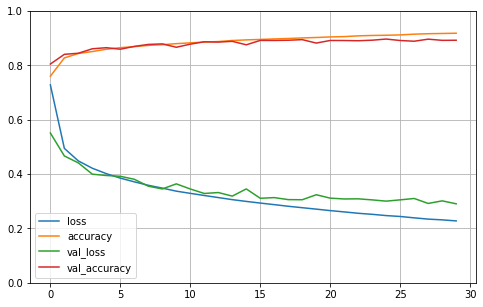

In [22]:
#History 객체에 훈련파라미터와 에포크 정보가 들어있다..
#그걸 그래프로 그림..

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)     #수직축의 범위를 0~1로 지정
plt.show()

**분석**

- 훈련 정확도와 검증 정확도 꾸준히 증가
- 훈련 손실과 검증 손실 감소..
- 훈련 곡선을 볼 때 왼쪽으로 에포크의 절반만큼 이동해서 봐라..

**모델 성능이 만족스럽지 않다면..?**

1. 학습률 확인
2. 그래도 안 좋으면 다른 파라미터
3. 다시 학습률..

In [23]:
#검증세트보다 조금 낮은 성능이 나오는게 일반적..

model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 65.5085 - accuracy: 0.8445


[65.50848388671875, 0.8445000052452087]

###모델을 사용해 예측을 만들기

In [24]:
#새로운 데이터에 대해서 예측을 한다..
#각 클래스일 확률을 반환..

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [25]:
#얘는 안되나바.. predict_classes가 안되나바..
"""
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])
"""

'\ny_pred = model.predict_classes(X_new)\nprint(y_pred)\nprint(np.array(class_names)[y_pred])\n'

In [26]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

##10.2.3 시퀀셜 API를 사용하여 회귀용 다층 퍼셉트론 만들기

화귀에서 달라진 점

- 출력층이 활성화 함수가 없는 하나의 뉴런이다
- 손실함수로 RMSE를 사용한다..

캘리포니아 주택 가격 데이터셋으로 시도하겠다 :

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

#훈련, 검증, 테스트세트 분리..
X_train_full , X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

#스케일링까지..
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [28]:
#11610개의 샘플, 8개의 특성

X_train.shape

(11610, 8)

In [29]:
#회귀라서 출력 뉴런 1개
model = keras.models.Sequential([
        keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),        #8개의 특성이 입력된다..
        keras.layers.Dense(1)       #출력층, 원하는 값의 수만큼 뉴런 생성
])

#회귀라서 손실도 RMSE
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

X_new = X_test[:3]      #새로운 샘플이라고 생각..
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9054 - val_loss: 0.9595
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8106 - val_loss: 0.5122
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4343 - val_loss: 0.4593
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4139 - val_loss: 0.4451
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4034 - val_loss: 0.4298
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3854 - val_loss: 0.4214
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3831 - val_loss: 0.4148
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3784 - val_loss: 0.4101
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3933 - val_loss: 0.4214
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3629 - val_loss: 0.3976

In [30]:
#손실함수 값..

mse_test

0.35666000843048096

In [31]:
#예측 값..

y_pred

array([[2.109302 ],
       [1.8280717],
       [1.3480762]], dtype=float32)

##10.2.4 함수형 API를 사용해 복잡한 모델 만들기

입력의 일부 또는 전체가 출력층에 바로 연결됨..

- 은닉층을 모두 통과하는 입력은 **복잡한 패턴**을 학습한다
- 바로 출력층에 연결되는 입력은 **간단한 규칙**을 학습한다..

In [32]:
#입력 지정..
input_ = keras.layers.Input(shape=X_train.shape[1:])

#층을 함수라고 생각했을때 input_이 입력이 된다..
hidden1 = keras.layers.Dense(30, activation="relu")(input_)     
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#입력과 은닉층의 결과를 연결하는 연결층..
concat = keras.layers.Concatenate()([input_, hidden2])

#출력층에 전달..
output = keras.layers.Dense(1)(concat)

#초기 입력과 최종 출력을 연결해서 모델 생성..
model = keras.Model(inputs=[input_], outputs=[output])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

컴파일하고 훈련해서 예측하기..

In [34]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.9027 - val_loss: 0.9384
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8092 - val_loss: 0.8185
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7272 - val_loss: 0.7515
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6738 - val_loss: 0.7052
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6324 - val_loss: 0.6664
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6001 - val_loss: 0.6501
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5736 - val_loss: 0.6145
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5529 - val_loss: 0.5976
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5357 - val_loss: 0.5876
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5215 - val_loss: 0.5755

두 경로에 다른 입력 특성을 전달하기

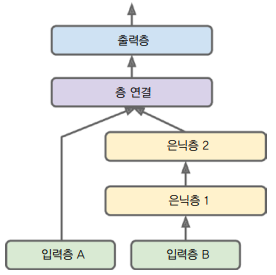

In [35]:
#입력을 따로 지정..
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")

#은닉층에는 input_B만 전달
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

#input_A와 은닉층의 결과 합침..
concat = keras.layers.concatenate([input_A, hidden2])
#출력층에 전달..
output = keras.layers.Dense(1, name="output")(concat)

#두개의 입력을 구분해서 리스트로 전달..
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [36]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_12 (Dense)                (None, 30)           930         dense_11[0][0]                   
____________________________________________________________________________________________

컴파일, 훈련, 예측 할때도 모두 입력을 다르게 해줘야함..

- 모델의 입력에 맞도록!!

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#전체 특성이 8개였음..
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]

#새로운 데이터 지정..
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

#훈련(입력을 다르게 넣어줌..)
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

#예측할 때도..
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0848 - val_loss: 0.9554
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7470 - val_loss: 0.7332
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6456 - val_loss: 0.6793
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6000 - val_loss: 0.6410
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5711 - val_loss: 0.6166
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5510 - val_loss: 0.5998
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5352 - val_loss: 0.5865
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5216 - val_loss: 0.5737
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5121 - val_loss: 0.5708
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5033 - val_loss: 0.5560

In [38]:
mse_test

0.49466991424560547

In [39]:
y_pred

array([[2.5920267],
       [1.948524 ],
       [1.274003 ]], dtype=float32)

보조출력을 추가하기!!

- 은닉층의 결과만 따로 출력하고 싶다..
- 각 출력은 자신만의 손실 함수가 필요하다..
    - 따로 컴파일단계에서 지정해 줘야한다!

In [40]:
#위와 동일..
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)

#보조 출력 추가.. 두번째 은닉층의 결과를 받아옴..
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)

#모델 생성 시 출력에도 추가..
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [41]:
#각 출력을 위한 손실함수를 리스트로 전달..
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [42]:
#훈련..
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.6040 - main_output_loss: 2.4764 - aux_output_loss: 3.7532 - val_loss: 1.3745 - val_main_output_loss: 1.1989 - val_aux_output_loss: 2.9552
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0678 - main_output_loss: 0.9080 - aux_output_loss: 2.5061 - val_loss: 0.9710 - val_main_output_loss: 0.8315 - val_aux_output_loss: 2.2262
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8428 - main_output_loss: 0.7138 - aux_output_loss: 2.0037 - val_loss: 0.8491 - val_main_output_loss: 0.7329 - val_aux_output_loss: 1.8952
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7590 - main_output_loss: 0.6467 - aux_output_loss: 1.7694 - val_loss: 0.7876 - val_main_output_loss: 0.6832 - val_aux_output_loss: 1.7274
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7116 - main_output_loss: 0.6084 - aux_output_loss: 1.6409 - val_loss

In [43]:
#evaluate()메서드 수행 시 개별 손실과 함께 총 손실도 반홛..
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

#예측도 각 출력에 대한 예측을 반환..
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 1ms/step - loss: 0.5623 - main_output_loss: 0.5016 - aux_output_loss: 1.1089


In [44]:
print(total_loss, main_loss, aux_loss)
print(y_pred_main)
print(y_pred_aux)

0.5623286366462708 0.5015957355499268 1.1089245080947876
[[2.6677628]
 [1.9577506]
 [1.3149649]]
[[2.062422 ]
 [1.8995578]
 [1.6353428]]


##10.2.5 서브클래싱 API로 동적 모델 만들기

- 위의 시퀀셜 API, 함수형 API는 모두 선언적이다..
- 정적인 그래프이다..
- 장점이 많다..
    - 저장, 복사, 공유가 쉽다..
    - 모델의 구조를 분석하기 쉽다..
- 단점이 될 수도 있는데, 좀 딱딱한 느김이다..
- 서브클래싱 API를 사용하면 더 자유로워진다

**서브클래싱 API 분석**

- 장점
    - call()메서드 안에서 어떠한 계산도 사용할 수 있다..
- 단점
    - 분석이 어렵다..
    - 층 간의 연결 정보를 얻기 어렵다..

In [45]:
class WideAndDeepModel(keras.Model):
    #생성자에서 층 구성..
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)  #표준 매개변수를 처리합니다
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    #call메서드에서 수행하려는 연산을 기술..
    def call(self, inputs):
        input_A, input_B = inputs   #인자로 받은 입력..

        #은닉층 구성하고 input_B 특성만 전달..
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden_1)

        #연결층에서 연결..
        concat = keras.layers.concatenate([input_A, hidden2])

        #메인과 보조출력 추가..
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

**분석**

- 생성자와 call()메서드에서 층 구성과 정방향 계산을 분리했다..

##10.2.6 모델 저장과 복원

In [46]:
#모델 생성..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

#모델 컴파일..
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

#훈련 및 예측..
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.3111 - val_loss: 1.1206
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8388 - val_loss: 0.7353
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6546 - val_loss: 0.6676
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6112 - val_loss: 0.6329
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5821 - val_loss: 0.6090
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5602 - val_loss: 0.5861
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5412 - val_loss: 0.5683
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5251 - val_loss: 0.5535
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5113 - val_loss: 0.5397
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5233


In [47]:
#모델 저장

model.save("my_keras_model.h5")

In [48]:
#불러오기

model = keras.models.load_model("my_keras_model.h5")

In [49]:
#가중치 저장 및 불러오기도 가능

model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

##10.2.7 콜백 사용하기

훈련과정에서 일정한 간격으로 체크포인트를 지정

In [50]:
#모델 생성..
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

#모델 컴파일..
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

체크포인트 생성

In [51]:
#최상의 검증 세트 점수에서만 모델 저장..
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

#최상의 모델로 롤백
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7868 - val_loss: 0.9388
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.8075 - val_loss: 0.7791
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6907 - val_loss: 0.7194
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6417 - val_loss: 0.6737
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6039 - val_loss: 0.6433
Epoch 6/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5747 - val_loss: 0.6143
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5507 - val_loss: 0.5916
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5318 - val_loss: 0.5773
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5168 - val_loss: 0.5624
Epoch 10/10
162/162 [==============================] - 0s 1ms/step - loss: 0.5193


**조기종료 콜백 사용**

- 에포크의 제한이 없어진다...

In [52]:
#조기종료 콜백 객체 생성
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

#훈련..
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4946 - val_loss: 0.5410
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4862 - val_loss: 0.5331
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4793 - val_loss: 0.5242
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4734 - val_loss: 0.5187
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4683 - val_loss: 0.5123
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4639 - val_loss: 0.5076
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4599 - val_loss: 0.5040
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4565 - val_loss: 0.4994
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4537 - val_loss: 0.4975
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4509 - val_lo

사용자 정의 콜백도 만들 수 있다..

- 훈련하는 동안 검증손실과 훈련손실의 비율을 출력한다..
- 과대적합 방지 용도..

In [53]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [54]:
#이렇게 전달 가능..

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3478 - val_loss: 0.3799

val/train: 1.09
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3467 - val_loss: 0.3809

val/train: 1.10
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3461 - val_loss: 0.3801

val/train: 1.10
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3456 - val_loss: 0.3776

val/train: 1.09
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3449 - val_loss: 0.3775

val/train: 1.09
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3445 - val_loss: 0.3773

val/train: 1.10
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3437 - val_loss: 0.3759

val/train: 1.09
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3429 - val_loss: 0.3759

val/train: 1.10
Epoch 9/20
363/363 [==============================] - 1s 2ms/ste

##10.2.8 텐서보드를 사용해 시각화하기

#10.3 신경망 하이퍼파라미터 튜닝하기

- 신경망이 유연할수록, 트레이드오프로 조정할 하이퍼파라미터가 많다는 단점도 존재한다..

- 랜덤서치나 그리드서치를 조진다..

build_model()메서드 생성..

- 시퀀셜 모델 생성
- n_hidden만큼의 은닉층 생성..
- 은닉층의 뉴런 수는 n_neurons..

In [55]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    #시퀀셜 모델 생성..
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    
    #n_hidden 만큼의 은닉층 추가
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))

    #옵티마이저 지정..
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [56]:
#기본 build_model으로 모델 생성..

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [57]:
#콜백 지정해서 훈련..

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3301 - val_loss: 0.7528
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6264 - val_loss: 0.6334
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5495 - val_loss: 0.5703
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5038 - val_loss: 0.5401
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4929 - val_loss: 0.5375
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4780 - val_loss: 0.5057
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4567 - val_loss: 0.5062
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4514 - val_loss: 0.5115
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4446 - val_loss: 0.4899
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4400 - val_lo

In [58]:
#점수 확인..
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 917us/step - loss: 0.3687


In [59]:
#예측 확인..
#보류..

y_pred = keras_reg.predict(X_new)

In [60]:
y_pred

array([2.0328043, 1.8199148, 1.495131 ], dtype=float32)

**랜덤 서치**

- 오류 해결을 위한 .tolist(), .rvs(1000).tolist()

In [61]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

#탐색할 하이퍼파라미터..
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

#랜덤서치 객체.. cv가 지정되므로 X_valid와 y_valid는 조기종료에만 사용됨..
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs,
                                   n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=23, n_hidden=3, learning_rate=0.0277582354248053 ......
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 0.9072 - val_loss: 0.4483
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4019 - val_loss: 0.5630
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5014 - val_loss: 0.5222
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3845 - val_loss: 0.4165
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4065 - val_loss: 0.4035
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.3814
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3404 - val_loss: 0.3682
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3270 - val_loss: 0.3647
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3256 - val_loss: 0.3888
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3316 - val_loss: 0.3685
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


242/242 [==============================] - 1s 2ms/step - loss: 0.6567 - val_loss: 0.6572
Epoch 2/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6969 - val_loss: 0.5206
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4831 - val_loss: 0.5093
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4596 - val_loss: 0.4626
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4905 - val_loss: 0.4432
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4034 - val_loss: 0.4234
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3771 - val_loss: 0.4113
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3639 - val_loss: 0.3994
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3558 - val_loss: 0.3934
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3454 - val_loss: 0.3876
E

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 20.4min finished


363/363 [==============================] - 1s 2ms/step - loss: 0.7161 - val_loss: 0.5764
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4463 - val_loss: 0.4358
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4098 - val_loss: 0.4180
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3885 - val_loss: 0.4222
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3766 - val_loss: 0.3947
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3688 - val_loss: 0.3979
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3630 - val_loss: 0.3762
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3501 - val_loss: 0.3770
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3869
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3443 - val_loss: 0.3796
E

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f1e7c3d0850>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.000844572050109007,
                                                          0.029561677041492953,
                                                          0.006487105888488411,
                                                          0.00668482622925348,
                                                          0.0005300855312043795,
                                                          0.005821763147394912,
                                                          0.0004000161804620486,
                                                          0.000900...
                                                          0.010143140076494252,
                                                          0.009711066884838545,
      

In [62]:
rnd_search_cv.best_params_

{'learning_rate': 0.0277582354248053, 'n_hidden': 3, 'n_neurons': 23}

In [63]:
rnd_search_cv.best_score_

-0.3148067394892375

In [64]:
model = rnd_search_cv.best_estimator_.model

**랜덤서치의 단점**

- 하이퍼파라미터 공간이 크면 시간이 오래 걸린다..
- 하이퍼파라미터의 값의 범위를 크게해서 일단 첫 범위를 찾고, 그 중에 좋은 곳에서 또 다시 랜덤서치함..

**더 효율적인 탐색 기법**

- 탐색지역이 좋다고 판명될 때 더 탐색을 수행한다!!
- 이용할 수 있는 라이브러리들..
    - Hyperpot
    - Hyperas, kopt, Talos
    - 케라스 튜너
    - Scikit-Optimize(skopt)
    - Spearmint
    - Hyperband
    - Sklearn-Deap

##10.3.1 은닉층 개수

- 깊어질수록 고수준의 구조를 모델링
- 복잡한 문제에서는 심층 신경망이 얕은 신경망보다 **파라미터 효율성**이 좋다
    - 아래쪽 은닉층은 저수준의 구조 모델링
    - 중간 은닉층은 중간 수준의 구조 모델링
    - 위쪽 은닉층과 출력층은 중간의 구조를 연결해 고수준의 구조를 모델링..
    - **전이 학습**도 가능..

**정리**

- 보통 한두개의 은닉층으로도 문제 잘 해결..
- 근데 복잡해지면 과대적합되기 전까지 점진적으로 은닉층의 수를 늘려간다..
- 훈련데이터도 엄청나게 필요하다..
- 보통은 이전에 비슷한 작업에서 좋은 성능을 낸 네트워크의 일부를 재사용한다.. (**전이 학습**)

##10.3.2 은닉층의 뉴런 개수

**입력 뉴런, 출력 뉴런의 갯수**

- 해당 작업에 필요한 입력과 출력의 형태에 따라 결정됨..
- ex) 숫자 mnist : 28*28개의 입력뉴런, 10개의 출력뉴런

**은닉층의 구성**

- 일반적으로 각 층의 뉴런을 점점 줄여서 깔때기처럼 구성
- 첫번째 은닉층을 크게 하는 것이 도움이 됨..
- 실전에서는 **필요한 것보다 더 많은 층과 뉴런을 가진 모델을 선택하고, 조기종료나 규제기법을 사용하는 것**이 효과적임..
- 한 층의 뉴런 수가 너무 적으면 입력의 유용한 특성을 충분히 표현하지 못한다..
    - ex) 3D데이터인데 뉴런이 2개라면 다 표현을 못한다..

##10.3.3 학습률, 배치 크기 그리고 다른 하이퍼파라미터

###학습률

- 매우 낮은 학습률에서 점점 키워가면서 조정..
- 다른 하이퍼파라미터 조정 후 다시 탐색해야함..

###옵티마이저

- 좋은 옵티마이저를 선택해라..

###배치 크기

- 크게 좋다는 쪽도 있고
- 32개의 배치 사이즈로 하는게 국룰이라는 쪽도 있다..

###활성화 함수

- 기본값 : Relu

###반복 획수

- 이건 조정하기 보다는 엄청 크게 한 다음 조기종료하는게 더 이득..

#10.4 연습문제